# Midterm Data Science 2000
## Student ID: xxxxxx
## General comments
The open-book Midterm tests for knowledge and skills acquired in the first half of the semester, especially in the first 6 Assignments. You are allowed to use any document and source on your computer and look up documents on the internet. You or not allowed to share documents, or communicate in any other way with people inside or outside the class room during the midterm. You are not allowed to use ChatGPT, co-pilot or any other similar AI.

In VScode, you need to have the CoPilot and CoPilot extension **uninstalled** before starting the midterm.
In Google Collab you need to go to settings to disable the AI functionality. See last announcement for details.

**If you get caught with AI completion installed (even if it seems disabled at this point), it will be reported as academic dishonesty.**

You need to submit the midterm by the due date (12:20) on OWL under Midterm_OpenBook. Late submission will be scored with 0 pts, unless you have received extra accommodation. So please start your submission five minutes before the deadline!  

### Additional Guidance
The midterm is supposed to be challenging. If you get stuck on a particular question because you can't solve a programming problem, just write down in text *how* you would try to solve the problem - if correct, this can give you partial points. Then continue the next question.
If you need the solution from a previous problem, just *assume* some outcome and answer the question under that assumption. If you do this, make your assumptions explicit.

Read all the questions carefully. Most questions demands a written answer as part of it. These need to be spelled out in a whole English sentence.

To finish the midterm in the alloted time, you will have to work fast and efficiently. Good luck!

## General grading criteria
- The code must be working. After you are done clear the output and re-run the whole notebook to check.
- The notebook should be submitted with the final output shown.
- Results should be reported in understandable sentences.
- Results should be reported rounded to a reasonable number of decimals.
- Each figure needs to have x and y axes labeled.
- Each Figure should have a text caption that explains what is displayed in the Figure (type of plot, x, y, grouping variables).


## Preliminaries
You are allowed to use the following packages in python, but no other packages. For solving the problems, use the approaches and concepts you learned in class.

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as ss
import pandas as pd
import numpy as np
import seaborn as sb

## Data set
Based on your suggestions from the close-book portion of the exam, the researchers from the weight-loss study have redone their experiment with a full random assignment of participants to the four groups. This time they relied only on random assignment and did not block for gender.
As before, the experiment compares different weight-loss drugs against each other. Adult participants were recruited to the experiment. Participants were randomly assigned to one of four groups: Placebo (P), Semaglutide (S), Phentermine-topiramate (Pt), and Orlistat (O). They received the medication. a nutritional plan, and a regular exercise regiment. The main outcome variable was body weight - this was measured before and after 1 month of taking the drug / placebo and following the program.

The data frame contains the data fields
- group: 	        Whether the participant was in the Placebo (P), Semaglutide (S), Phentermine-topiramate (Pt), or Orlistat (O) group
- age:   		    Age of the person in years
- gender:			'M':male  or 'F':female
- weight_before: 	weight (in kg) at the Beginning of the study
- weight_after:     weight (in kg) at the end of the study
- weight_change:    Difference in weight from before to after

Note that some participants did not finish the trial - this may be because they did not tolerate the side-effects of the medication, or because they terminated the study for other reasons not related to the medication.
These participants have a `nan` value as missing value for the weight_after and weight_change.

## Question 1 (4pt)
Load the weight_loss.csv file.
Report the frequencies of male and female participants in the four groups in a table. [2ts]

Written answer: Which group has the largest proportion of female participants? [2pts]


In [6]:
df = pd.read_csv("weight_loss.csv")

pd.crosstab(df['group'], df['gender'])

gender,F,M
group,,
O,14,21
P,16,19
Pt,21,14
S,17,18


Pt had the highest proportion of female participants.

## Question 2 (5pt)
Generate a box plot, which shows the weight change  for the four groups, separately for male and female participants.
Remember to provide X and Y label and a figure caption.

Written answers: Which group shows the largest average weight loss overall?

What other observation can you make that is relevant when interpreting how well each medication works? Why is it relevant?

Text(0.5, 1.0, 'Male and Female weight change by group')

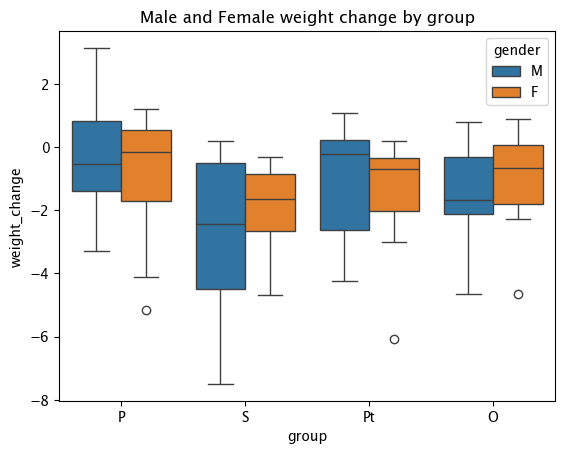

In [26]:
ax = sb.boxplot(x='group', y='weight_change', data=df, hue='gender')
ax.set_title("Male and Female weight change by group")

Group S shows the largest average weight loss overall.
Another obsetvation you can make that is relevant when interpreting how well each medication works is by looking at the size of the boxes. Larger boxes indicate a higher deviation from the mean.

## Question 3 (4pts)
It has been shown that the amount of weight loss is usually proportional to the initial weight of the person.

Given this, calculate and report the mean initial weight (`weight_before`) for each of the groups (P, S, Pt, O),

Also report the mean initial weight, split only by gender.

Written answer: Give this, and the observations from Question 1 amd 2, explain how these group differences could bias your conclusion about which medication is the most effective.

In [32]:
weightByGroup = df['weight_before'].groupby(df['group']).mean()
print(weightByGroup)

weightByGender = df['weight_before'].groupby(df['gender']).mean()
print(weightByGender)


group
O     84.034946
P     84.104562
Pt    79.397475
S     82.142762
Name: weight_before, dtype: float64
gender
F    76.291407
M    88.207992
Name: weight_before, dtype: float64


Given the initial weight difference and the observations from question 1 and 2, there is a higher proportion of females in in group Pt which lowers the average weight of that group. Since weight loss is proportional to initial weight and the initial weight of group Pt is less than other groups, group pt is likely to show less weight loss than other groups.

## Question 4 (3pt)

Based on your insights from Question 1-3, suggest a way of avoiding a bias when you try to estimate the mean effect of the medication.
Without having to redo the study and collect new data, how could you address this issue in the analysis? Describe your approach in a few sentences. 

One way to reduce bais when estimating the mean effect of the mediation is to use a percentage of the initial weight when reporting weight loss. This would eliminate the bais from the difference in initial weights in the groups. This issue could be addressed by taking weight_change and dividing it by weight_before and storing that value in percent_weight_change. Then reporting this percent_weight_change instead of weight_change.

## Question 5 [5pts]
Calculate and report the dropout rates for the four groups.

Written answer: What could could the dropout rates you observed mean? How may this influence you conclusion from the study?

In [ ]:
# dropoutByGroup = df[df['weight_after'] == 'nan'].groupby(df['group'])

(pd.isna(df['weight_after'])).groupby(df['group'])


## Question 6 (5pts)
Write a function that calculates and the Chi2-square value for the difference between the observed dropout rate and the expected dropout rate across groups, assuming that the dropout is independent of the medication group.  
Call the function and report the Chi2-value. 

In [ ]:
def calcX2(D,rows='',cols='group'):
    observed = pd.crosstab(D[rows],D[cols], margins=True)
    expected = np.outer(observed["All"][0:-1], observed.loc["All"][0:-1]) /observed['All']['All']
    observed = pd.crosstab(D[rows],D[cols],margins=False)
    return sum(sum((observed.values-expected)**2/expected))

calcX2(df)

# Question 7 (5pts)
Using the function from Q4, test the hypothesis that the dropout rates are the same for all groups (use a permutation test).

Written answer: What is your null hypothesis and what is your conclusion?

## Question 8 (4pt)
Write a function that calculates the difference in the median of one of the groups and the median of the placebo group. The group of interest should be an optional input parameter of the function, with the default value of 'S'. Report the median difference for all three groups (S, Pt, O) compared to the placebo group rounded to 3 decimal places.

Written answer: Which group shows the largest difference?

In [58]:
def med_diff():
    weightByGroup = df['weight_before'].groupby(df['group'])

    return weightByGroup.get_group('P').median() - weightByGroup.get_group('S').median()

med_diff()

np.float64(0.8209982626526937)

## Question 9 (5pts)
Conduct a permutation test to test the hypothesis that the median weight loss in the Semaglutide group is larger than the Placebo group.
Your code should produce a figure that shows the distribution of the chosen test statistics under the Null hypothesis, as well as the empirical value as a vertical line.  Remember to provide axis labels and a caption.

Written answer: Report the value of the statistics and the associated p-value, using at least 5000 iterations. What do you conclude regarding the hypothesis formulated above, using a significance threshold of p=0.05?

In [ ]:
def prob_diff(data):

    # generate the contingency table
    #tab = pd.crosstab(data['genre'] == 'comedy', data['dirGender'], margins = True)

    # calculate the difference
    #p_diff = (tab['female'][True]/tab['female']['All']) - (tab['male'][True]/tab['male']['All'])

    return p_diff

def randomize_column (df,colname):
    df_copy = df.copy()
    var = df_copy[colname].values
    np.random.shuffle(var)
    df_copy[colname]=var
    return df_copy

def permutation_test(data):

    # shuffle = 'dirGender'
    numIter = 5000

    stat = np.zeros(numIter, dtype = 'float64') # initialize the numpy array that will store the test stat

    ## 1. shuffling the "exchangeable" variable
    i = 0 # iteration variable
    while i < numIter:

        ## permute (shuffle) the exchangeable variable
        tmpDF = randomize_column(df,'')

        ## calculate the test stat.
        stat[i] = prob_diff(tmpDF)
        i += 1

    ## 2. plotting the histogram of the test statistic
    plt.figure()
    plt.hist(stat, bins = 10)
    empStat = prob_diff(data)
    plt.axvline(x = empStat, color = 'r')

    plt.show()

    ## 3. calculating the p-value (one-sided)
    p_value = sum(stat >= empStat)/len(stat)

    print('P-value of the randomisation test is p=',p_value)

    return p_value

## Question 10 (10pts)
We are coming back to Question 9 and on the closed-book exam:
Here we wanted to establish the average effect size (median weight loss difference per month) for Semaglutide vs. Placebo group with confidence interval. You hopefully recommended to perform a bootstrap as opposed to a randomization test. The correct approach here is to resample data for each group separately, each time calculating the median difference between the two bootstrap groups. Write a bootstrap function that achieves this goal.
Plot the histogram on the bootstrap estimates of the median difference. Remember to provide X and Y label and caption. Report the 95% confidence interval for the median difference in weight loss between the Semaglutide and Placebo group. Show the CI in your plot.

Written answer: How would the CI change if we conducted a bootstrap on the Semaglutide only, and each time subtract the median of the real (non-boostrapped) Placebo group? Why would this not the the correct approach?  

In [ ]:
def bootstrap(data, N, fcn, numIter = 1000):
    stats = np.array(range(numIter), dtype = 'float64')
    stats = np.array(range(numIter),dtype = 'float64')
    for i in range(numIter):
        sample=np.random.choice(data,N, replace = True)
        stats[i]=fcn(sample)
    return stats


If we conducted a bootstrap on the Semaglutide only, the CI interval would increase due to having less data overall. 